Importing Dependencies

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
path = './data/raw/car data.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding categorical data to numerical data

In [9]:
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_17080\2747402826.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_17080\2747402826.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_17080\2747402826.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Training and Test Data

In [11]:
X = df.drop(['Car_Name','Selling_Price'], axis=1)
y = df['Selling_Price']

In [12]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [13]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

### Model Training

#### Linear Regression

In [20]:
model1 = LinearRegression()

In [21]:
model1.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [22]:
y_pred = model1.predict(X_test)

In [23]:
y_pred

array([10.37761177, 10.53101062,  4.49552252,  5.57933769,  2.60458157,
        8.73793093,  7.40734539,  1.52366668, 15.89175758,  4.76608883,
        6.33273576,  6.52389404,  3.51872442,  3.13961514, -0.68495874,
        4.28790652,  9.2609021 , -0.35079867,  9.34633447,  1.18010217,
        7.61043836, 18.01754482, 19.45949769,  0.23805849,  2.1307204 ,
        4.86363474,  5.05812902,  6.94556259,  5.31420261,  5.63285646,
        4.42111231,  8.06086042,  5.81277404, -0.57139186,  0.7121926 ,
        6.61505627,  7.52001221,  5.48635327,  1.1358701 ,  1.16924982,
        2.09654099,  5.24356235, 14.26314322, -8.64585382,  1.41363311,
        4.05846921, -0.96482233,  8.07192811,  4.39205469,  4.88916506,
        5.24618767, 16.1732445 ,  0.73964183,  1.66886485,  1.61428682,
       -1.47570513,  2.81845772,  0.74828173, -1.83207075,  1.62857371,
        0.68698358])

Checking model accuracy

In [24]:
r2_score1 = metrics.r2_score(y_test, y_pred)

In [25]:
r2_score1

0.865032054620642

In [26]:
mse1 = metrics.mean_squared_error(y_test, y_pred)
mse1

3.6226444073886497

Vizualize the actual and Predicted prices

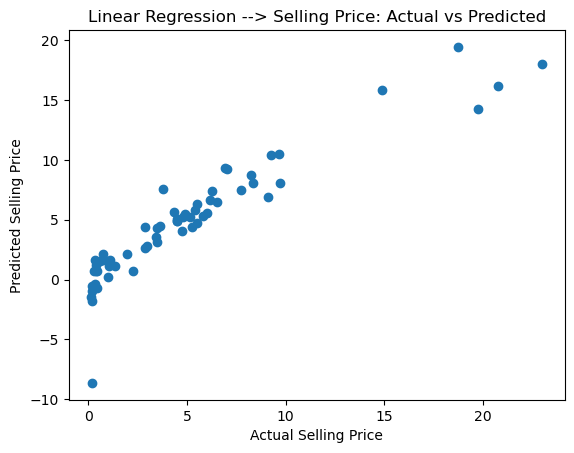

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel("Predicted Selling Price")
plt.title("Linear Regression --> Selling Price: Actual vs Predicted")
plt.show()

In [29]:
model2 = Lasso()

model2.fit(X_train, y_train)

Lasso()

In [30]:
y_pred2 =  model2.predict(X_test)

In [31]:
r2_score2 = metrics.r2_score(y_test, y_pred2)

In [32]:
r2_score2

0.8072510341947781

In [ ]:
mse2 = metrics.mean_squared_error(y_test, y_pred)
mse2

3.6226444073886497

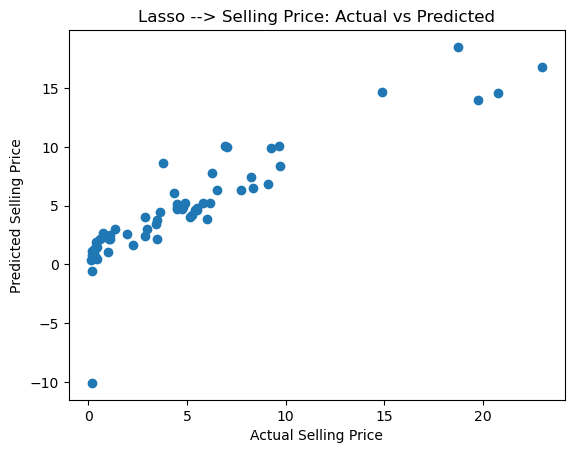

In [35]:
plt.scatter(y_test, y_pred2)
plt.xlabel('Actual Selling Price')
plt.ylabel("Predicted Selling Price")
plt.title("Lasso --> Selling Price: Actual vs Predicted")
plt.show()